<a href="https://colab.research.google.com/github/HarshitGoel5/Healthcare_Analytics/blob/main/Report_Healthcare_Analyutics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats

In [44]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Thoracic-Surgery.csv', index_col = 'id')
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,,
1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 1 to 470
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 66.1+ KB


In [46]:
df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = (df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)

In [47]:
df['DGN'] = df['DGN'].str[-1:].astype(int)
df['PRE6'] = df['PRE6'].str[-1:].astype(int)
df['PRE14'] = df['PRE14'].str[-1:].astype(int)

In [48]:
col = ['Daignosis','Forced_Capacity','Forced_Expiration','Zubrod_scale','Pain','Haemoptysis','Dyspnoea',
       'Cough','Weakness','Size_of_tumor','diabetes','MI_6months','PAD','Smoker','Asthmatic','Age','Risk_1y']
df.columns = col

##Observation:

*   Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Diabetes Mellitus,Heart Attack in 6 mos,PAD,Smoking,Asthma,DeathIn1yr
*   Categorical FVC,FEV1,Age - Numerical






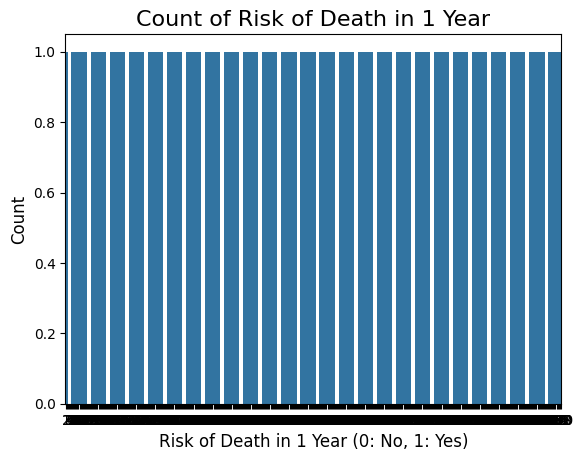

In [73]:
sns.countplot(df['Risk_1y'])
plt.title('Count of Risk of Death in 1 Year', fontsize=16)
plt.xlabel('Risk of Death in 1 Year (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [50]:

df['Risk_1y'].value_counts(normalize=True)

,proportion
Risk_1y,
0,0.851064
1,0.148936


In [51]:
df['Smoker'].value_counts(normalize=True)

,proportion
Smoker,
1,0.821277
0,0.178723


In [52]:
df['Cough'].value_counts(normalize=True)

,proportion
Cough,
1,0.687234
0,0.312766


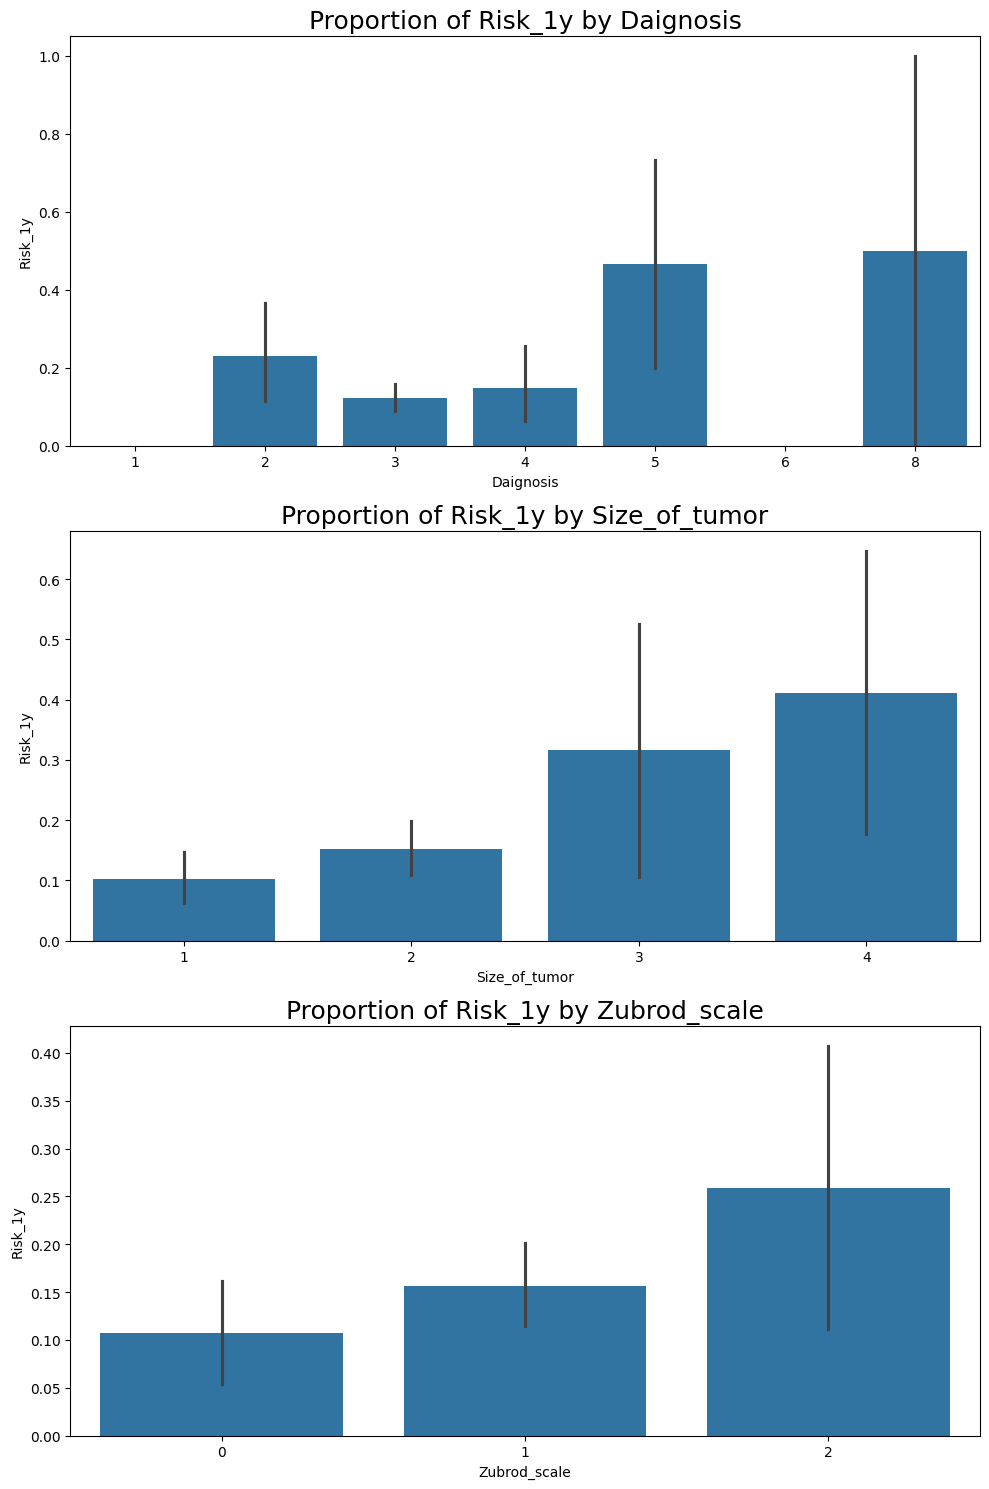

In [74]:
fig, axes = plt.subplots(3,1,figsize=(10,15))
sns.barplot(x='Daignosis', y='Risk_1y', data=df,ax=axes[0]).set_title('Proportion of Risk_1y by Daignosis', fontsize=18)
sns.barplot(x='Size_of_tumor', y='Risk_1y', data=df, ax=axes[1]).set_title('Proportion of Risk_1y by Size_of_tumor', fontsize=18)
sns.barplot(x='Zubrod_scale', y='Risk_1y', data=df, ax=axes[2]).set_title('Proportion of Risk_1y by Zubrod_scale', fontsize=18)

plt.tight_layout()

Risk_1y     0   1
diabetes         
0         375  60
1          25  10


Text(0.5, 1.0, 'Diabetes Vs DeathInyr')

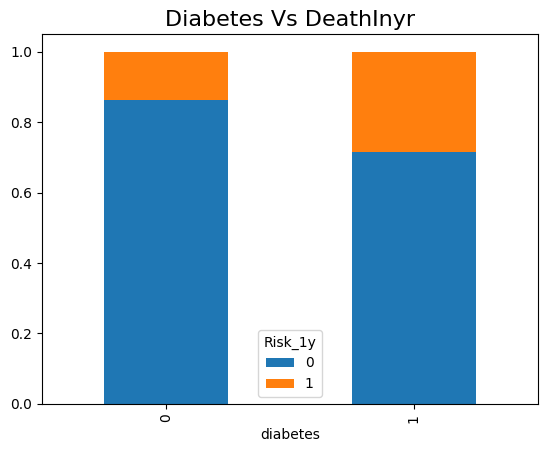

In [54]:
tab = pd.crosstab(df['diabetes'], df['Risk_1y'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Diabetes Vs DeathInyr', fontsize=16)

Risk_1y       0   1
MI_6months         
0           398  70
1             2   0


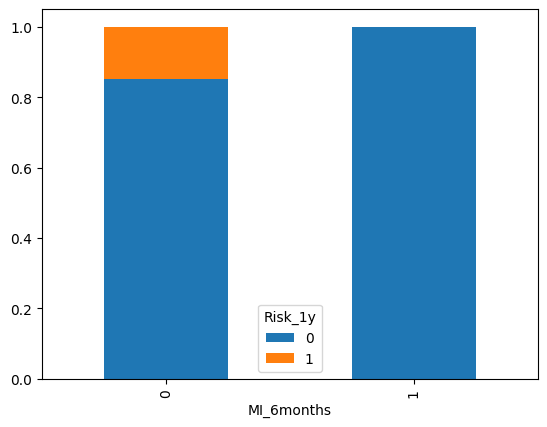

In [55]:
tab = pd.crosstab(df['MI_6months'], df['Risk_1y'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [56]:
df.head()

,Daignosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1y
id,,,,,,,,,,,,,,,,,
1,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
2,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
3,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
4,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
5,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [57]:
#df.drop(['id'], axis = 0)
corr=df.corr()
corr

,Daignosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1y
Daignosis,1.000000,0.121263,0.058780,-0.055900,0.047900,-0.062958,-0.047142,-0.075850,-0.019562,-0.135050,0.029753,-0.008675,-0.017461,-0.107427,-0.008675,0.076271,0.060444
Forced_Capacity,0.121263,1.000000,0.032975,-0.091094,0.019786,-0.095827,0.055829,-0.052770,-0.100242,0.034088,-0.115145,-0.009135,-0.035584,-0.012009,-0.060578,-0.290178,-0.046374
Forced_Expiration,0.058780,0.032975,1.000000,-0.143155,0.161615,0.102979,0.260073,-0.099914,-0.086103,0.015504,-0.022251,-0.013617,-0.025088,-0.100853,-0.016509,-0.115900,-0.042841
Zubrod_scale,-0.055900,-0.091094,-0.143155,1.000000,0.092863,0.123296,0.092863,0.684647,0.418042,0.089751,0.025310,0.026788,0.023166,0.172289,-0.034330,0.214528,0.093200
Pain,0.047900,0.019786,0.161615,0.092863,1.000000,0.256225,0.067529,-0.024115,-0.072455,0.099942,0.022578,-0.017372,-0.034968,-0.077406,-0.017372,0.044789,0.057375
Haemoptysis,-0.062958,-0.095827,0.102979,0.123296,0.256225,1.000000,0.134386,0.081772,0.060393,0.059840,-0.001471,-0.026886,0.086156,-0.044942,-0.026886,0.086705,0.065785
Dyspnoea,-0.047142,0.055829,0.260073,0.092863,0.067529,0.134386,1.000000,0.049843,-0.072455,0.075502,-0.042725,-0.017372,0.097572,-0.077406,-0.017372,-0.015331,0.105530
Cough,-0.075850,-0.052770,-0.099914,0.684647,-0.024115,0.081772,0.049843,1.000000,0.202245,0.145345,0.016551,0.044101,0.017815,0.200373,-0.026401,0.149589,0.088860
Weakness,-0.019562,-0.100242,-0.086103,0.418042,-0.072455,0.060393,-0.072455,0.202245,1.000000,-0.036044,0.069522,0.058695,0.029726,0.118527,-0.029161,0.208003,0.086467
Size_of_tumor,-0.135050,0.034088,0.015504,0.089751,0.099942,0.059840,0.075502,0.145345,-0.036044,1.000000,0.037363,-0.022009,-0.020854,0.038303,-0.022009,0.016118,0.174371


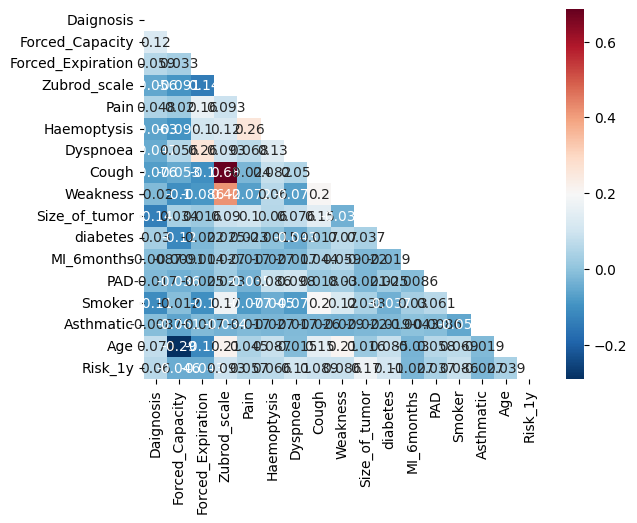

In [58]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,annot=True, mask=mask, cmap='RdBu_r')
plt.show()

In [59]:

# Correlation coefficients for FVC and FEV1
np.corrcoef(df.Forced_Capacity, df.Forced_Expiration)[0,1]

np.float64(0.03297526542399739)

In [60]:
# Correlation coefficients for Age and FVC
np.corrcoef(df.Age, df.Forced_Capacity)[0,1]

np.float64(-0.29017783759887766)

In [61]:
# Correlation coefficients for Age and FEV1
np.corrcoef(df.Age, df.Forced_Expiration)[0,1]

np.float64(-0.11590000147248944)

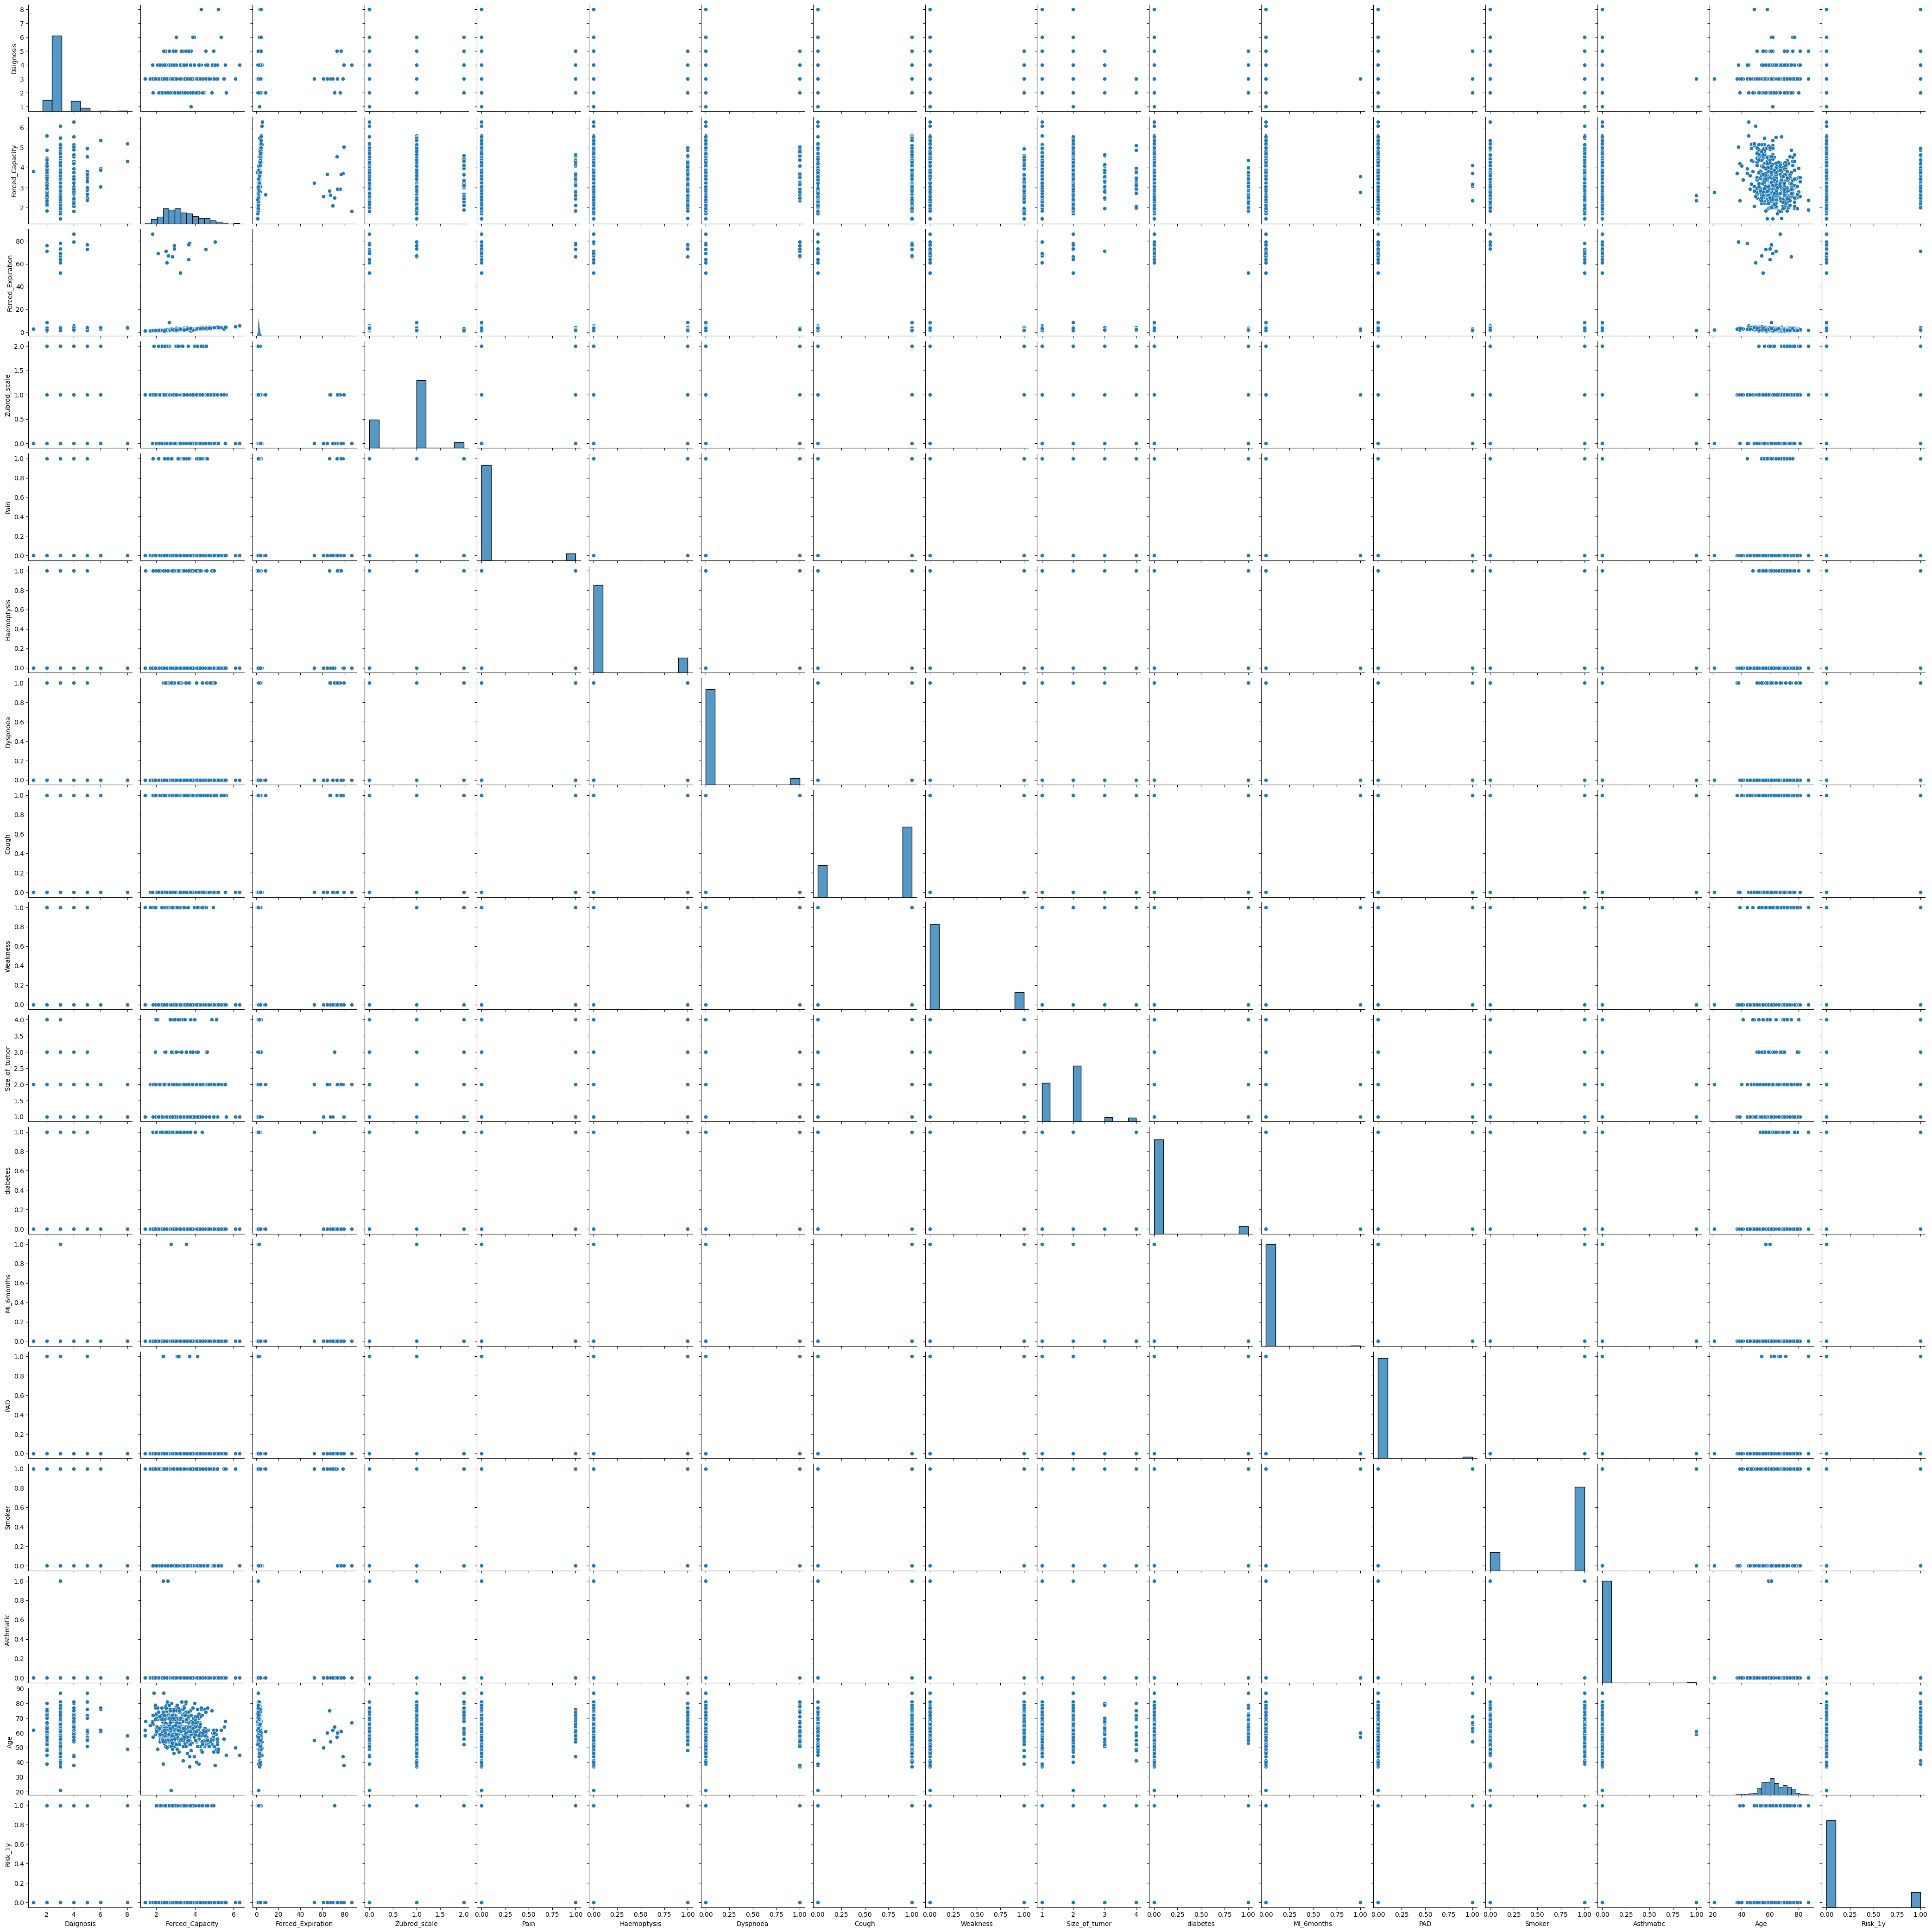

In [62]:
sns.pairplot(df)

Dyspnoea    0   1
Risk_1y          
0         378  22
1          61   9


Text(0.5, 1.0, 'DeathInyr vs Dyspnoea')

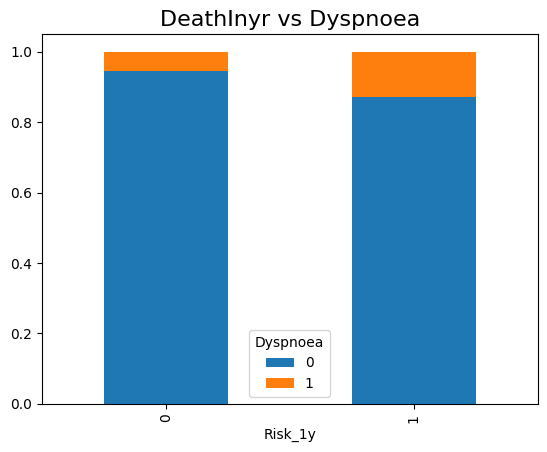

In [63]:

tab = pd.crosstab(df['Risk_1y'], df['Dyspnoea'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathInyr vs Dyspnoea', fontsize=16)

Pain       0   1
Risk_1y         
0        376  24
1         63   7


Text(0.5, 1.0, 'DeathInyr Vs Pain')

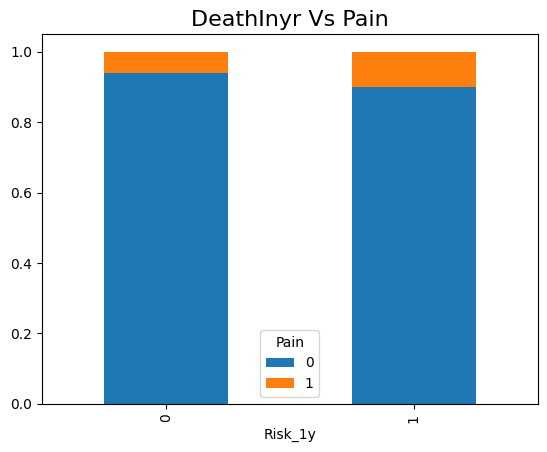

In [64]:
tab = pd.crosstab(df['Risk_1y'], df['Pain'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathInyr Vs Pain', fontsize=16)

Haemoptysis    0   1
Risk_1y             
0            346  54
1             56  14


Text(0.5, 1.0, 'DeathInyr vs Haemopytsis')

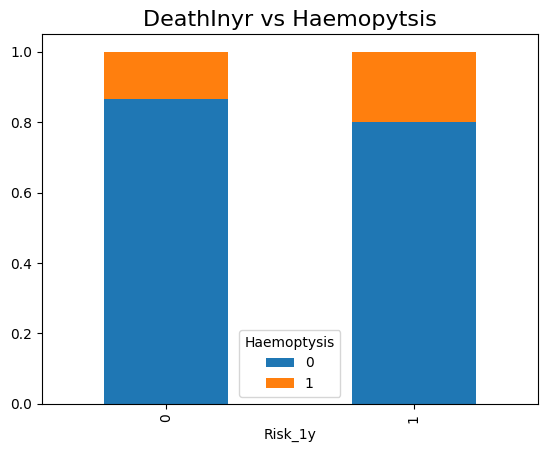

In [65]:
tab = pd.crosstab(df['Risk_1y'], df['Haemoptysis'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathInyr vs Haemopytsis', fontsize=16)

Cough      0    1
Risk_1y          
0        132  268
1         15   55


Text(0.5, 1.0, 'DeathIn1yr Vs Cough')

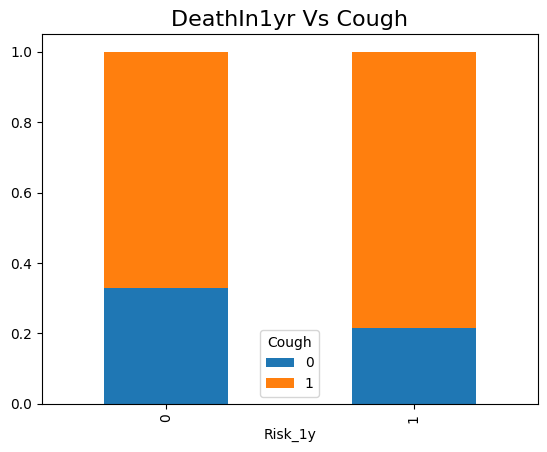

In [66]:
tab = pd.crosstab(df['Risk_1y'], df['Cough'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathIn1yr Vs Cough', fontsize=16)

Smoker    0    1
Risk_1y         
0        77  323
1         7   63


Text(0.5, 1.0, 'DeathIn1yr Vs Smoking')

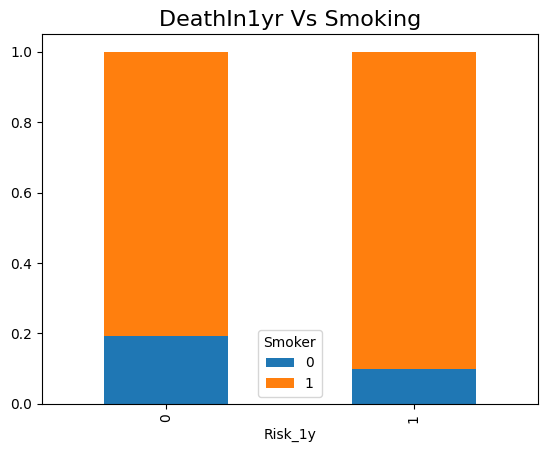

In [67]:
tab = pd.crosstab(df['Risk_1y'], df['Smoker'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathIn1yr Vs Smoking', fontsize=16)

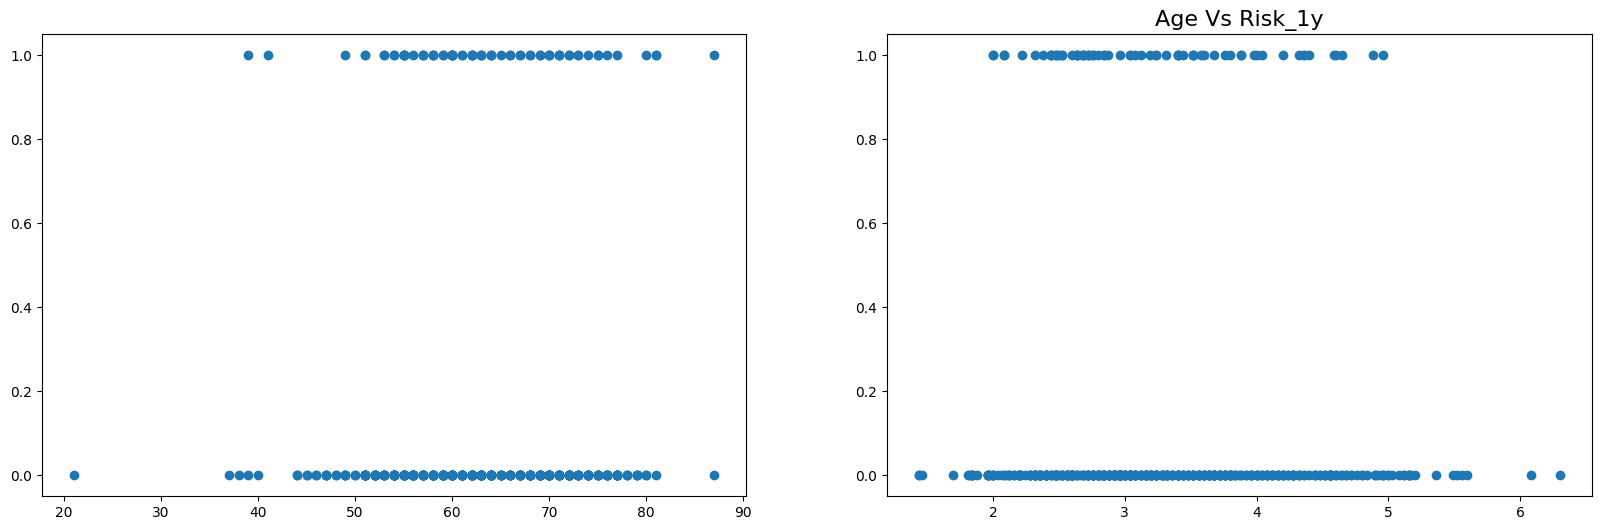

In [68]:
fig, (axes1, axes2) = plt.subplots(1,2, figsize = (20 , 6))
axes1.scatter(y = df.Risk_1y, x = df.Age)
axes2.scatter(x = df.Forced_Capacity, y = df.Risk_1y)
plt.title('Forced_Capacity Vs Risk_1y', fontsize=16)
plt.title('Age Vs Risk_1y', fontsize=16)
plt.show()

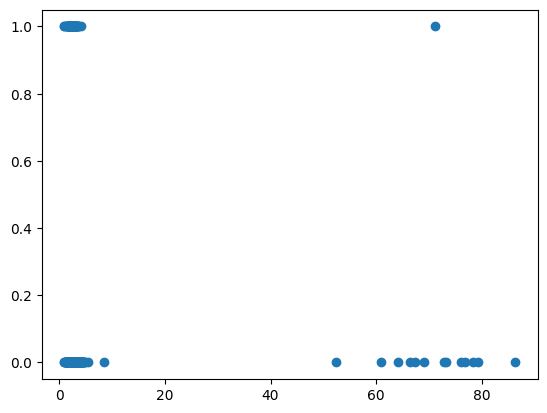

In [69]:
plt.scatter(x = df.Forced_Expiration, y = df.Risk_1y)
plt.show()

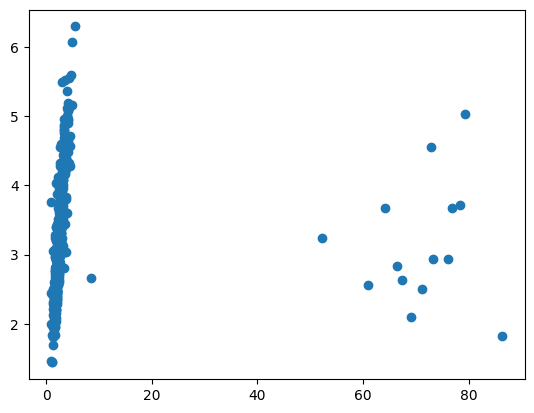

In [70]:
plt.scatter(x = df.Forced_Expiration, y = df.Forced_Capacity)
plt.show()

In [71]:
np.corrcoef(df.Forced_Capacity, df.Forced_Expiration)[0,1]

np.float64(0.03297526542399739)

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


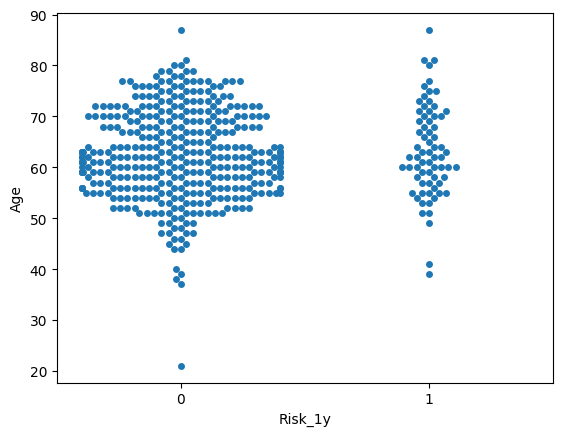

In [72]:
sns.swarmplot(y=df.Age,data=df,x=df.Risk_1y)
plt.show()